# Credit Risk Evaluator

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [25]:
# Import the data
df = pd.read_csv('Resources/lending_data.csv')
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

This process will run two models on this data: a Logistic Regression, and a Random Forests Classifier. Before executing that two models, my guess is that, at first glance, the data has 6 features, all data types are numeric.However some columns have a linear relationship between them(`['debt_to_income']=['total_debt']/['borrower_income']`) and also `['number_of_accounts']` seems not a factor to verify a person's payback ability. Therefore, the number of explanatory variables is 4 ,and the number of noise variables is 2. In my opinion, the performance of Logistic Regression's prediction could be better.

## Split the Data into Training and Testing Sets

In [26]:
y = df['loan_status']
ycheck = y.value_counts()
ycheck

0    75036
1     2500
Name: loan_status, dtype: int64

In [27]:
X=df.drop('loan_status',axis=1)
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


In [28]:
# Split the data into X_train, X_test, y_train, y_test
# the ratio of loan_status of 0 & 1 is unbalanced.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, stratify=y, random_state=32)
unique_element_train, counts_elements_train = np.unique(y_train, return_counts=True)
unique_element_test, counts_elements_test = np.unique(y_test, return_counts=True)
print(np.asarray((unique_element_train, counts_elements_train)))
print(np.asarray((unique_element_test, counts_elements_test)))

[[    0     1]
 [37518  1250]]
[[    0     1]
 [37518  1250]]


In [29]:
Scaler = StandardScaler().fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

### <span style='font-family:Helvetica;color:darkorange'>Logistic Regression

##### <span style='font-family:Helvetica;color:#F5B041 '>Logistic Regression(KNN)

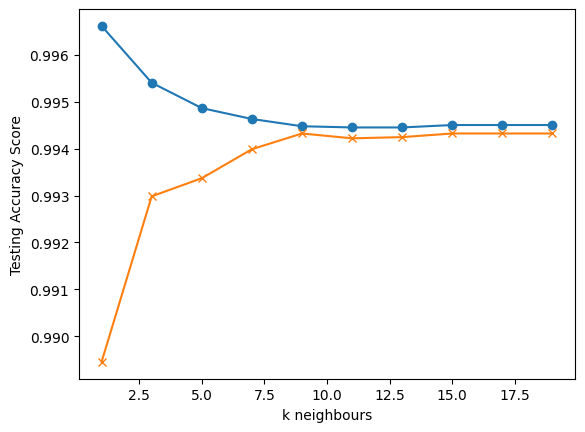

In [30]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.plot(range(1,20,2),train_scores, marker = 'o')
plt.plot(range(1,20,2),test_scores, marker = 'x')
plt.xlabel('k neighbours')
plt.ylabel('Testing Accuracy Score')
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
test_scores.append(knn.score(X_test_scaled, y_test))
print('k=13 Test Acc %.3f' % knn.score(X_test_scaled,y_test))

k=13 Test Acc 0.994


In [37]:
# Print the classification report for the K Nearest Neighbours model

y_pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     37518
           1       0.85      1.00      0.92      1250

    accuracy                           0.99     38768
   macro avg       0.93      1.00      0.96     38768
weighted avg       1.00      0.99      0.99     38768



In [38]:
# Score the prediction with MSE
mse = mean_squared_error(y_test,y_pred_knn)
mse

0.005674783326454808

### <span style='font-family:Helvetica;color:darkorange'> Random Forest Classifier

In [34]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 5)
clf = classifier.fit(X_train_scaled,y_train)
print('Model: RandomForestClassifier')
print(f'Score: {clf.score(X_test_scaled, y_test)}')
 

Model: RandomForestClassifier
Score: 0.9915394139496492


In [39]:
# Score the prediction with MSE
y_pred_RDC = clf.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred_RDC)
mse

0.008460586050350804

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*